In [1]:
#Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

#Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

#Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

/var/folders/km/gsswvxvj1cb9g4g9f_m7z5n80000gn/T/ipykernel_70538/484608498.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


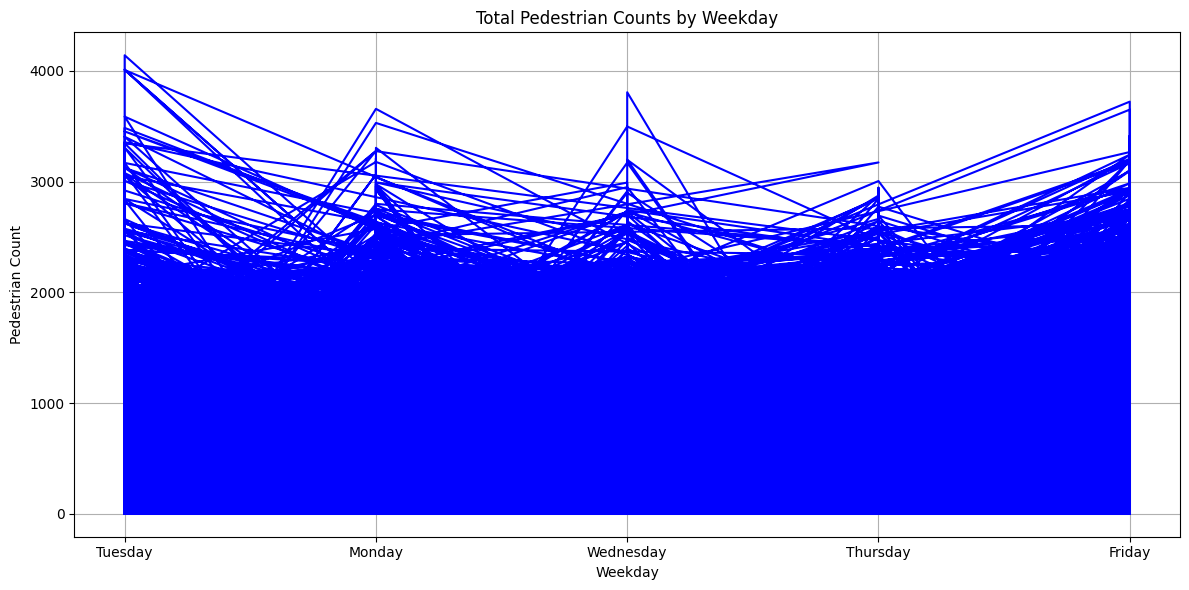

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD'
def linegraph():
    df = pd.read_csv(url,sep=',')
    df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
    df['day_name'] = df['hour_beginning'].dt.day_name()
    df = df[~df['day_name'].isin(['Saturday', 'Sunday'])]
    plt.figure(figsize=(12, 6))
    plt.plot(df['day_name'],df['Pedestrians'], color='blue')
    plt.title('Total Pedestrian Counts by Weekday')
    plt.xlabel('Weekday')
    plt.ylabel('Pedestrian Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
linegraph()

/var/folders/km/gsswvxvj1cb9g4g9f_m7z5n80000gn/T/ipykernel_70538/3846910785.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['temperature'] = df['temperature'].fillna(method="ffill")
/var/folders/km/gsswvxvj1cb9g4g9f_m7z5n80000gn/T/ipykernel_70538/3846910785.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['precipitation'] = df['precipitation'].fillna(method="ffill")
/var/folders/km/gsswvxvj1cb9g4g9f_m7z5n80000gn/T/ipykernel_70538/3846910785.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['weather_summary'] = df['weather_summary'].fillna(method="ffill")


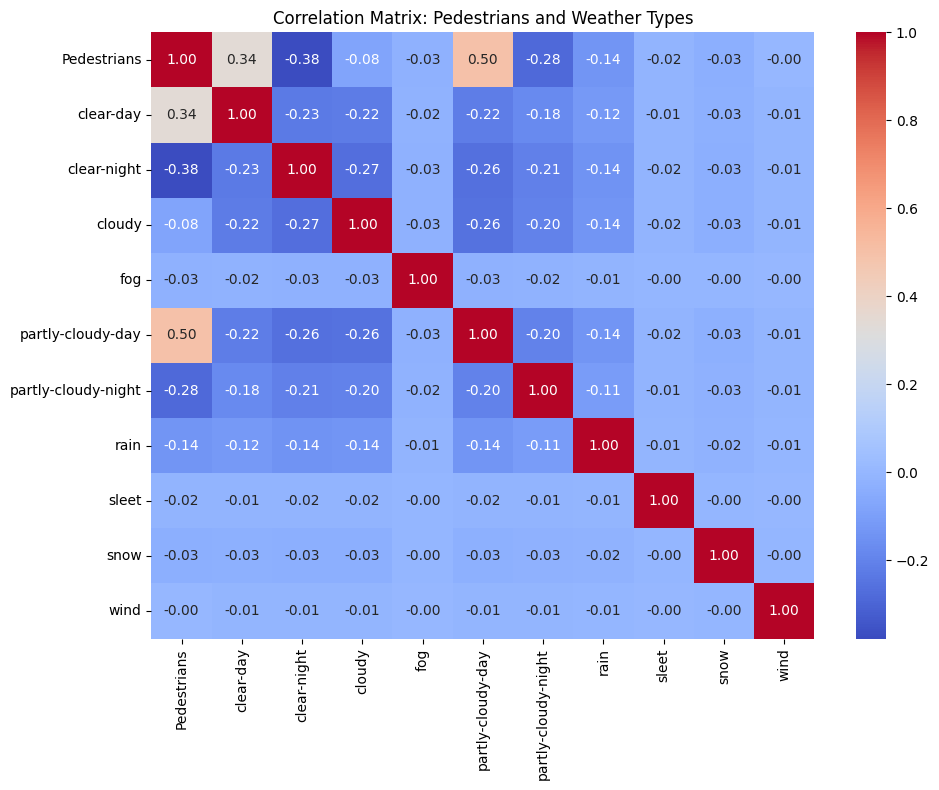

In [20]:
import seaborn as sns
def weather2019():
    df = pd.read_csv(url,sep=',')
    df = df.sort_values(by='hour_beginning')
    df.reset_index(drop=True, inplace=True)
    df['temperature'] = df['temperature'].fillna(method="ffill")
    df['precipitation'] = df['precipitation'].fillna(method="ffill")
    df['weather_summary'] = df['weather_summary'].fillna(method="ffill")
    df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
    df['year'] = df['hour_beginning'].dt.year
    df = df[~df['year'].isin([2018,2017])]
    weather = pd.get_dummies(df['weather_summary'])
    
    # Combine with Pedestrians column
    correlation_df = pd.concat([df[['Pedestrians']], weather], axis=1)
    
    # Calculate correlation
    correlation_matrix = correlation_df.corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix: Pedestrians and Weather Types')
    plt.tight_layout()
    plt.show()

weather2019()

/var/folders/km/gsswvxvj1cb9g4g9f_m7z5n80000gn/T/ipykernel_70538/1066983271.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


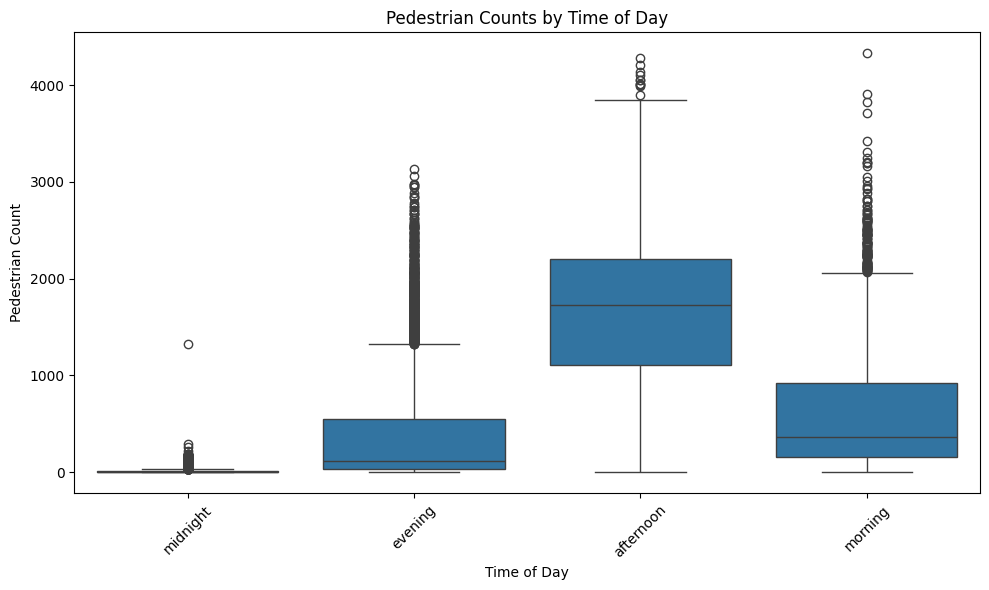

In [15]:
import numpy as np
def timeofday():
    df = pd.read_csv(url,sep=',')
    df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
    df['hour'] = df['hour_beginning'].dt.hour
    
    df['time_of_day'] = np.where((df['hour'] >= 6) & (df['hour'] < 12), 'morning',
                         np.where((df['hour'] >= 12) & (df['hour'] < 18), 'afternoon',
                         np.where((df['hour'] >= 18) & (df['hour'] < 24), 'evening','midnight')))
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='time_of_day', y='Pedestrians')
    plt.title('Pedestrian Counts by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Pedestrian Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
timeofday()